<a href="https://colab.research.google.com/github/CarineMS/UFV/blob/main/ELT575_ES115044_Atividade_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Atividade Prática 01

## Disciplina: ELT575 - Aprendizado Profundo
#### Semana 02 - Redes Neurais Convolucionais

**Aluna:** Carine Madeira Soares

**Instituição:** Universidade Federal de Viçosa


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


print('Setup completo!')

Setup completo!


#  Dataset cifar10

In [ ]:
# carregando dataset e separando dados de treino e teste
(trainX, trainY), (testX, testY) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


As 10 possíveis classes do dataset são:
* Avião (airplane)
* Automóvel (automobile)
* Pássaro (bird)
* Gato (cat)
* Cervo (deer)
* Cão (dog)
* Sapo (frog)
* Cavalo (horse)
* Navio (ship)
* Caminhão (truck)

In [ ]:
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

Para compreender o processo de normalização dos dados é interessante visualizar os valores máximo e minimos dos dados X e Y

In [ ]:
trainX.min(), trainX.max(), trainX.mean(), len(trainX)

(0, 255, 120.70756512369792, 50000)

In [ ]:
trainY.min(), trainY.max()

(0, 9)

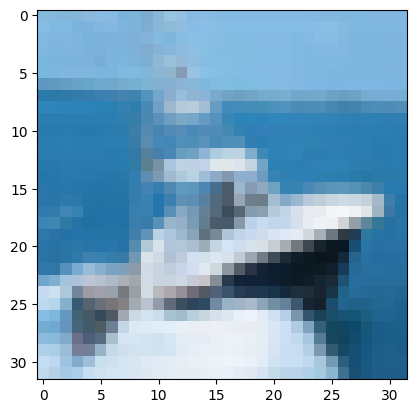

In [ ]:
# plot como exemplo das imagens do dataframe
plt.imshow(trainX[8], cmap='gray');

In [ ]:
class_names[8]

'ship'

In [ ]:
# fazendo um reshape no dataset para ter um único canal
trainX = trainX.reshape((trainX.shape[0], 32, 32, 3))
testX = testX.reshape((testX.shape[0], 32, 32, 3))

# Convertendo valores dos pixels em float
trainX = trainX.astype('float32')
testX = testX.astype('float32')

# normalização para escala [0-1]
trainX = trainX / 255.0
testX = testX / 255.0

# transformando a variável alvo (target) para uma codificação one hot
trainY = to_categorical(trainY)
testY = to_categorical(testY)

Verificando os tamanhos, valores máximos, mínimos e média das variáveis criadas.

In [ ]:
np.unique(trainY, return_counts=True)

(array([0., 1.], dtype=float32), array([450000,  50000]))

In [ ]:
def describe(arr):
  # medidas de tendência central
  mean = np.mean(arr)
  median = np.median(arr)
  lenn = len(arr)
  ttype = arr.dtype
  sshape = arr.shape
  val_unique = np.unique(arr, return_counts=True)

  # measures of dispersion
  min = np.amin(arr)
  max = np.amax(arr)
  range = np.ptp(arr)
  variance = np.var(arr)
  sd = np.std(arr)

  print("Análise Descritiva \n")
  # print("Array =", arr)
  print("Medidas de Tendência Central")
  print("  Mean =", mean)
  print("  Median =", median)
  print("\nMedidas de dispersão")
  print("  Minimum =", min)
  print("  Maximum =", max)
  print("  Range =", range)
  print("  Length =", lenn)
  print("  Type =", ttype)
  print("  Shape =", sshape)
  print("  Variance =", variance)
  print("  Standard Deviation =", sd)
  print("\nValores únicos =", val_unique)

In [ ]:
describe(trainY)

Análise Descritiva 

Medidas de Tendência Central
  Mean = 0.1
  Median = 0.0

Medidas de dispersão
  Minimum = 0.0
  Maximum = 1.0
  Range = 1.0
  Length = 50000
  Type = float32
  Shape = (50000, 10)
  Variance = 0.09000001
  Standard Deviation = 0.3

Valores únicos = (array([0., 1.], dtype=float32), array([450000,  50000]))


In [ ]:
describe(trainX)

Análise Descritiva 

Medidas de Tendência Central
  Mean = 0.4733649
  Median = 0.45882353

Medidas de dispersão
  Minimum = 0.0
  Maximum = 1.0
  Range = 1.0
  Length = 50000
  Type = float32
  Shape = (50000, 32, 32, 3)
  Variance = 0.063287
  Standard Deviation = 0.25156906


# Construindo o modelo

Nesse ponto substituimos as informações do input do exemplo fornecido pelo professor. Logo, foi substituido:
`input_shape = (28, 28, 1)` por `input_shape = (32,32,3)`.

Mantivesse as entradas da classe `Conv2D` pois optou-se por permanecer com 32 filtros em que cada um deles tenha tamanho 3x3.

In [ ]:
# definindo modelo
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  # compilando modelo
  opt = Adam(learning_rate=0.001)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

# Treinamento do modelo

Epoch 1/10
1250/1250 [==============================] - 17s 5ms/step - loss: 1.3959 - accuracy: 0.5056 - val_loss: 1.2248 - val_accuracy: 0.5678
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0503 - accuracy: 0.6282 - val_loss: 1.3146 - val_accuracy: 0.5604
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8385 - accuracy: 0.7039 - val_loss: 1.1749 - val_accuracy: 0.6090
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6634 - accuracy: 0.7662 - val_loss: 1.3115 - val_accuracy: 0.6028
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.4996 - accuracy: 0.8266 - val_loss: 1.4652 - val_accuracy: 0.5880
Epoch 6/10
1250/1250 [==============================] - 6s 4ms/step - loss: 0.3746 - accuracy: 0.8698 - val_loss: 1.7397 - val_accuracy: 0.5808
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2846 - accuracy: 0.8999 - val_loss: 2.1124 - val_accuracy

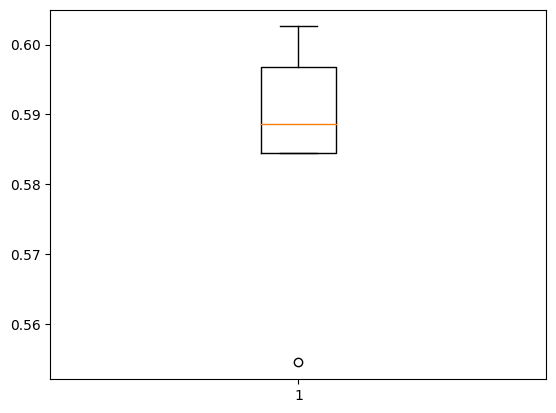

In [ ]:
scores = []
histories = []

# definindo a validação k-fold
kfold = KFold(5, shuffle=True, random_state=1)

# loop para as k-folds (cada fold usa subconjuntos de treino e teste diferentes)
for train_ix, test_ix in kfold.split(trainX):

  model = define_model()

  # recorta dados de acordo com índices da k-fold
  train_data, train_target, val_data, val_target = trainX[train_ix], trainY[train_ix], trainX[test_ix], trainY[test_ix]

  # treinamento do modelo
  history = model.fit(train_data, train_target,
                      epochs=10, batch_size=32,
                      validation_data=(val_data, val_target),
                      verbose=1)

  # desempenho do modelo
  _, acc = model.evaluate(val_data, val_target, verbose=0)
  print('> %.3f' % (acc * 100.0))

  # armazena resultados de cada modelo treinado dentro da k-fold
  scores.append(acc)
  histories.append(history)

print('Acurácia: média=%.3f desvio=%.3f' % (np.mean(scores)*100, np.std(scores)*100))
plt.boxplot(scores)
plt.show()

### Testando modelo no conjunto de teste

truck


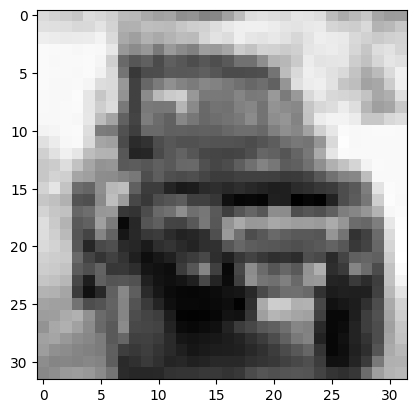

In [ ]:
plt.imshow(testX[9,:,:,0], cmap='gray');
print(class_names[9])

***

# Houve muita diferença no desempenho da rede treinada quando comparado ao exemplo?

Sim, no exemplo disponibilizado pelo professor observamos uma acurácia média de 98% e no exemplo acima obtive uma acurácia média de 58%, assim resultando numa diferença de **40%**, ou seja, podemos afirmar sem dúvida se tratar de uma diferença expressiva.

***

# Experimente adicionar mais dois blocos de camadas Conv2D (64 filtros 3x3 - relu) + MaxPooling (2 x 2) antes da camada Flatten e compare os resultados.

In [ ]:
# definindo modelo
def define_model():
  model = Sequential()
  model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  # compilando modelo
  opt = Adam(learning_rate=0.001)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Epoch 1/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3761 - accuracy: 0.5156 - val_loss: 1.4319 - val_accuracy: 0.5118
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0141 - accuracy: 0.6421 - val_loss: 1.3058 - val_accuracy: 0.5735
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8067 - accuracy: 0.7168 - val_loss: 1.4320 - val_accuracy: 0.5698
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6171 - accuracy: 0.7829 - val_loss: 1.2444 - val_accuracy: 0.6237
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.4435 - accuracy: 0.8466 - val_loss: 1.4145 - val_accuracy: 0.6170
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3278 - accuracy: 0.8871 - val_loss: 1.6691 - val_accuracy: 0.6108
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2529 - accuracy: 0.9152 - val_loss: 2.0873 - val_accuracy:

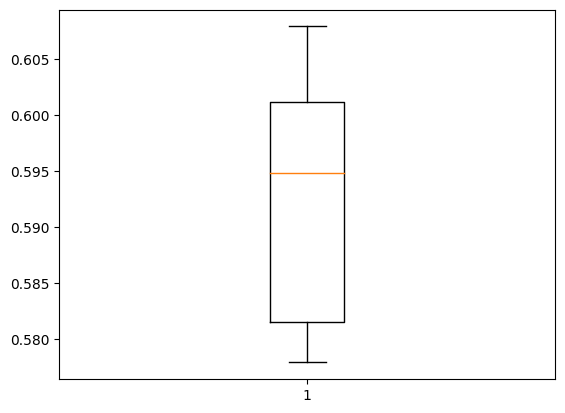

In [ ]:
scores = []
histories = []

# definindo a validação k-fold
kfold = KFold(5, shuffle=True, random_state=1)

# loop para as k-folds (cada fold usa subconjuntos de treino e teste diferentes)
for train_ix, test_ix in kfold.split(trainX):

  model = define_model()

  # recorta dados de acordo com índices da k-fold
  train_data, train_target, val_data, val_target = trainX[train_ix], trainY[train_ix], trainX[test_ix], trainY[test_ix]

  # treinamento do modelo
  history = model.fit(train_data, train_target,
                      epochs=10, batch_size=32,
                      validation_data=(val_data, val_target),
                      verbose=1)

  # desempenho do modelo
  _, acc = model.evaluate(val_data, val_target, verbose=0)
  print('> %.3f' % (acc * 100.0))

  # armazena resultados de cada modelo treinado dentro da k-fold
  scores.append(acc)
  histories.append(history)

print('Acurácia: média=%.3f desvio=%.3f' % (np.mean(scores)*100, np.std(scores)*100))
plt.boxplot(scores)
plt.show()

A inclusão dos dois blocos de camadas a mais com o Conv2D (64 filtros 3x3 - relu) não houve tanta diferença, passamos de **58.54%** para **59.26%**.
